# ERC-4626: all vaults on a particular chain

- In this notebook, we examine ERC-4626 vaults on a particular chain

## Usage

This is an open source notebook based on open data
- You can edit and remix this notebook yourself 

To do your own data research:

- Read general instructions [how to run the tutorials](./)
- See `ERC-4626: scanning vaults' historical price and performance` example in tutorials first how to build `vault-prices-1h.parquet` file.

For any questions, follow and contact [Trading Strategy community](https://tradingstrategy.ai/community).

## Setup

- Set up notebook rendering output mode
- Use static image charts so this notebook is readeable on Github / ReadTheDocs

In [1]:
import pandas as pd
from plotly.offline import init_notebook_mode
import plotly.io as pio

from eth_defi.vault.base import VaultSpec
from eth_defi.research.notebook import set_large_plotly_chart_font

pd.options.display.float_format = "{:,.2f}".format
pd.options.display.max_columns = None
pd.options.display.max_rows = None


# Set up Plotly chart output as SVG
image_format = "png"
width = 1400
height = 800

# https://stackoverflow.com/a/52956402/315168
init_notebook_mode()

# https://plotly.com/python/renderers/#overriding-the-default-renderer
pio.renderers.default = image_format

current_renderer = pio.renderers[image_format]
# Have SVGs default pixel with
current_renderer.width = width
current_renderer.height = height

# Set all Plotly charts to use large font sizes for better readability,
# for sharing on mobile
set_large_plotly_chart_font(line_width=5, legend_font_size=16)
pio.templates.default = "custom"

## Read and clean raw scanned vault price data

- Read the Parquet file produced earlier with price scan 
- Clean the data if necessary

In [2]:
import pickle
from pathlib import Path

from eth_defi.vault.vaultdb import VaultDatabase

data_folder = Path("~/.tradingstrategy/vaults").expanduser()

vault_db = VaultDatabase.read()

cleaned_data_parquet_file = data_folder / "cleaned-vault-prices-1h.parquet"
prices_df = pd.read_parquet(cleaned_data_parquet_file)

print(f"We have {len(vault_db):,} vaults in the database and {len(prices_df):,} price rows.")

We have 23,433 vaults in the database and 13,055,148 price rows.


## Choose chain to examine

- [See ChainList.org](https://chainlist.org/)

In [3]:
from eth_defi.vault.base import VaultSpec
from eth_defi.chain import get_chain_name

selected_chain_id = 42161  # Arbitrum
chain_name = get_chain_name(selected_chain_id)

print(f"Examining chain {chain_name} ({selected_chain_id})")


Examining chain Arbitrum (42161)


## Price data filtering

- Filter rices for our chains only

In [4]:

# last_sample_at = prices_df.index[-1]
# one_month_ago = last_sample_at - pd.DateOffset(months=1)

# PERIOD = [
#    one_month_ago,
#    last_sample_at,
#]
#
# mask = (prices_df.index >= PERIOD[0]) & (prices_df.index <= PERIOD[1])
prices_df = prices_df[prices_df["chain"] == selected_chain_id]
print(f"Examined prices contain {len(prices_df):,} price rows across all vaults on {chain_name}.")

prices_df.head(4)

Examined prices contain 3,035,085 price rows across all vaults on Arbitrum.


chain                                     address  \
timestamp                                                                
2024-01-11 09:13:06  42161  0x0022228a2cc5e7ef0274a7baa600d44da5ab5776   
2024-01-11 10:13:15  42161  0x0022228a2cc5e7ef0274a7baa600d44da5ab5776   
2024-01-11 11:13:20  42161  0x0022228a2cc5e7ef0274a7baa600d44da5ab5776   
2024-01-11 12:13:25  42161  0x0022228a2cc5e7ef0274a7baa600d44da5ab5776   

                     block_number  share_price  total_assets  total_supply  \
timestamp                                                                    
2024-01-11 09:13:06     169318721         1.00          1.00          1.00   
2024-01-11 10:13:15     169333121         1.00          1.00          1.00   
2024-01-11 11:13:20     169347521         1.00          1.00          1.00   
2024-01-11 12:13:25     169361921         1.00          1.00          1.00   

                     performance_fee  management_fee errors  \
timestamp                                                     
2024-01-11 09:13:06              NaN             NaN          
2024-01-11 10:13:15              NaN             NaN          
2024-01-11 11:13:20              NaN             NaN          
2024-01-11 12:13:25              NaN             NaN          

                                                                   id  \
timestamp                                                               
2024-01-11 09:13:06  42161-0x0022228a2cc5e7ef0274a7baa600d44da5ab5776   
2024-01-11 10:13:15  42161-0x0022228a2cc5e7ef0274a7baa600d44da5ab5776   
2024-01-11 11:13:20  42161-0x0022228a2cc5e7ef0274a7baa600d44da5ab5776   
2024-01-11 12:13:25  42161-0x0022228a2cc5e7ef0274a7baa600d44da5ab5776   

                                             name  event_count  \
timestamp                                                        
2024-01-11 09:13:06  Staked USDA (Arbitrum) #6327       126837   
2024-01-11 10:13:15  Staked USDA (Arbitrum) #6327       126837   
2024-01-11 11:13:20  Staked USDA (Arbitrum) #6327       126837   
2024-01-11 12:13:25  Staked USDA (Arbitrum) #6327       126837   

                               protocol  raw_share_price  pct_change_prev  \
timestamp                                                                   
2024-01-11 09:13:06  <unknown ERC-4626>             1.00              NaN   
2024-01-11 10:13:15  <unknown ERC-4626>             1.00             0.00   
2024-01-11 11:13:20  <unknown ERC-4626>             1.00             0.00   
2024-01-11 12:13:25  <unknown ERC-4626>             1.00             0.00   

                     pct_change_next  returns_1h  avg_assets_by_vault  \
timestamp                                                               
2024-01-11 09:13:06             0.00        0.00                 1.00   
2024-01-11 10:13:15             0.00        0.00                 1.00   
2024-01-11 11:13:20             0.00        0.00                 1.00   
2024-01-11 12:13:25             0.00        0.00                 1.00   

                     dynamic_tvl_threshold  tvl_filtering_mask  
timestamp                                                       
2024-01-11 09:13:06                   0.02                True  
2024-01-11 10:13:15                   0.02                True  
2024-01-11 11:13:20                   0.02                True  
2024-01-11 12:13:25                   0.02                True

## Filter vaults

- Choose vaults on our chain
- Filter out junk entries

In [5]:
min_tvl = 50_000

vault_db_chain = {spec: row for spec, row in vault_db.items() if spec.chain_id == selected_chain_id}
vault_db = {spec: row for spec, row in vault_db_chain.items() if (row["NAV"] or 0) >= min_tvl}
selected_vault_ids = {spec.as_string_id() for spec in vault_db.keys()}
prices_df = prices_df.loc[prices_df["id"].isin(selected_vault_ids)]

print(f"We have selectd {len(vault_db)} vaults out of total of {len(vault_db_chain):,} vaults on chain {chain_name}, having {len(prices_df):,} price rows.")

print("An example vault metadata:")
example_vault = next(iter(vault_db.values()))
display(pd.DataFrame(list(example_vault.items()), columns=["Key", "Value"]))

We have selectd 293 vaults out of total of 5,585 vaults on chain Arbitrum, having 717,669 price rows.
An example vault metadata:


Key                                              Value
0                Symbol                                             plvGLP
1                  Name                                   Plutus Vault GLP
2               Address         0x5326e71ff593ecc2cf7acae5fe57582d6e74cff1
3          Denomination                                             plsGLP
4                   NAV                          218852.566660400704649665
5              Protocol                                 <unknown ERC-4626>
6              Mgmt fee                                               None
7              Perf fee                                               None
8                Shares                          157940.074220509572793378
9            First seen                                2022-08-26 11:27:33
10      _detection_data  ERC4262VaultDetection(chain=42161, address='0x...
11  _denomination_token  {'name': 'Plutus Staked GLP', 'symbol': 'plsGL...
12         _share_token  {'name': 'Plutus Vault GLP', 'symbol': 'plvGLP...

## Calculate vault lifetime metrics

- Calculate the DataFrame of life time metrics for each vault


In [6]:
from eth_defi.research.vault_metrics import calculate_lifetime_metrics, clean_lifetime_metrics
from eth_defi.research.vault_metrics import format_lifetime_table

lifetime_data_df = calculate_lifetime_metrics(
    prices_df,
    vault_db,
)

print(f"Cleaning metrics for {len(lifetime_data_df):,} vaults")
lifetime_data_df = clean_lifetime_metrics(
    lifetime_data_df,
    max_annualised_return=0.5,  # 50% max return
)

print(f"Calculated lifetime metrics for {len(lifetime_data_df):,} vaults")

lifetime_data_df = lifetime_data_df.sort_values(["one_month_cagr"], ascending=False)

display(lifetime_data_df.head(2))

Calculating vault performance metrics:   0%|          | 0/130 [00:00<?, ?it/s]

Cleaning metrics for 130 vaults
Vault entries with too high NAV values filtered out: 0
Vault entries with too small ATH NAV values filtered out: 7
Vaults abnormally high returns: 7
Vault entries with too few deposit and redeem events (min 25) filtered out: 13
Calculated lifetime metrics for 102 vaults


/Users/moo/code/trade-executor/deps/web3-ethereum-defi/.venv/lib/python3.12/site-packages/tqdm/std.py:917: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



name  lifetime_return  cagr  three_months_returns  three_months_cagr  \
117  KITSUNE            -0.25 -0.31                  0.03               0.13   
59    HYPE++             0.39  0.43                  0.04               0.18   

     three_months_sharpe  one_month_returns  one_month_cagr  \
117                 3.46               0.03            0.45   
59                  2.79               0.03            0.37   

     three_months_volatility denomination     chain     peak_nav  current_nav  \
117                     0.00       USDC.e  Arbitrum   155,440.36    84,028.00   
59                      0.00       USDC.e  Arbitrum 6,241,538.82 3,541,406.72   

     years  mgmt_fee  perf_fee  event_count            protocol  \
117   0.76       NaN       NaN          192  <unknown ERC-4626>   
59    0.92      0.00      0.20          224          D2 Finance   

                               risk  \
117  VaultTechnicalRisk.blacklisted   
59    VaultTechnicalRisk.extra_high   

                                                   id          start_date  \
117  42161-0xe5a4f22fcb8893ba0831babf9a15558b5e83446f 2025-09-23 15:04:15   
59   42161-0x75288264fdfea8ce68e6d852696ab1ce2f3e5004 2025-09-23 15:04:15   

               end_date  
117 2025-10-23 15:02:50  
59  2025-10-23 15:02:50

## Top vault list

- List top vaults on the chain, formatted for readability



In [7]:
from eth_defi.research.vault_metrics import format_lifetime_table

min_tvl = 25_000

lifetime_data_filtered_df = lifetime_data_df[lifetime_data_df["current_nav"] >= min_tvl]

lifetime_data_filtered_df = lifetime_data_filtered_df.sort_values(["one_month_cagr"], ascending=False)

print(f"Vaults filtered by min TVL of ${min_tvl:,}, remaining {len(lifetime_data_filtered_df):,} vaults.")
formatted_df = format_lifetime_table(
    lifetime_data_filtered_df,
    add_index=True,
    add_address=True,
)

cols_to_move = ['Name', '1M return ann.', 'Address']
other_cols = [col for col in formatted_df.columns if col not in cols_to_move]
formatted_df = formatted_df[cols_to_move + other_cols]

print(f"Formatted data for {len(formatted_df):,} vaults.")

# Script output
max_address_dump = 300
head = formatted_df.head(max_address_dump)
vault_count = min(max_address_dump, len(head))
print(f"Top {vault_count} vaults by 1 month annualised return are: {', '.join(head['Name'])}")
print(f"Top {vault_count} vaults by 1 month annualised return are:\n{', '.join(head['Address'])}")

display(formatted_df)


Vaults filtered by min TVL of $25,000, remaining 99 vaults.
Formatted data for 98 vaults.
Top 98 vaults by 1 month annualised return are: HYPE++, Plutus Hedge Token, Silo Finance Borrowable USDC Deposit in ARB Silo, Harvest: USDC Vault (0x2d5F), USDC-2 yVault, gmUSDC, USDn2, Peapods Interest Bearing USDC - 25, Staked USDai, Harvest: USDC Vault (0x5E77), Clearstar High Yield USDC, Nashpoint DeFi & RWA Fund, Yield Chasing Silo USDC, Autopilot USDC Arbitrum, LazyVault_LowerRisk_USDC, Yield Chasing crvUSD, Yield Chasing USDC, Gains Network USDC, Silo Finance Borrowable USDC Deposit, SiloId: 145, Silo Finance Borrowable USDC Deposit, SiloId: 146, Clearstar USDC Reactor, MEV Capital USDC, Harvest: USDC Vault (0x4A8e), Hyperithm USDC, Dolomite: USDT, Yearn Degen USDC, Dolomite: USDC, Saving USX, Gauntlet USDC Core, Staked USDX, Prime Tether USD, Euler Arbitrum Yield USDC, Steakhouse Prime USDC, K3 Capital USDai USDC, Steakhouse High Yield USDC, Euler Arbitrum USDC, Euler Earn USDC, BasisOS US

Name 1M return ann.  \
#                                                                      
1                                              HYPE++         37.10%   
2                                  Plutus Hedge Token         24.76%   
3    Silo Finance Borrowable USDC Deposit in ARB Silo         23.30%   
4                        Harvest: USDC Vault (0x2d5F)         22.30%   
5                                       USDC-2 yVault         19.07%   
6                                              gmUSDC         17.77%   
7                                               USDn2         17.51%   
8                  Peapods Interest Bearing USDC - 25         13.92%   
9                                        Staked USDai         12.11%   
10                       Harvest: USDC Vault (0x5E77)         11.96%   
11                          Clearstar High Yield USDC         11.18%   
12                          Nashpoint DeFi & RWA Fund         11.01%   
13                            Yield Chasing Silo USDC         10.63%   
14                            Autopilot USDC Arbitrum         10.41%   
15                           LazyVault_LowerRisk_USDC         10.16%   
16                               Yield Chasing crvUSD          9.69%   
17                                 Yield Chasing USDC          9.59%   
18                                 Gains Network USDC          9.59%   
19  Silo Finance Borrowable USDC Deposit, SiloId: 145          9.14%   
20  Silo Finance Borrowable USDC Deposit, SiloId: 146          9.13%   
21                             Clearstar USDC Reactor          9.08%   
22                                   MEV Capital USDC          8.80%   
23                       Harvest: USDC Vault (0x4A8e)          8.48%   
24                                     Hyperithm USDC          8.30%   
25                                     Dolomite: USDT          8.21%   
26                                   Yearn Degen USDC          7.55%   
27                                     Dolomite: USDC          7.49%   
28                                         Saving USX          7.25%   
29                                 Gauntlet USDC Core          6.80%   
30                                        Staked USDX          6.26%   
31                                   Prime Tether USD          6.23%   
32                          Euler Arbitrum Yield USDC          5.75%   
33                              Steakhouse Prime USDC          5.70%   
34                              K3 Capital USDai USDC          5.65%   
35                         Steakhouse High Yield USDC          5.47%   
36                                Euler Arbitrum USDC          5.38%   
37                                    Euler Earn USDC          5.33%   
38                      BasisOS USDC-LINK Hyperliquid          5.23%   
39                         Wrapped Aave Arbitrum USDT          5.11%   
40                          Static Aave Arbitrum USDT          5.11%   
41                                      Yearn OG USDC          4.96%   
42                                   Spark USDC Vault          4.92%   
43                          Wrapped Aave Arbitrum GHO          4.88%   
44                                 Frontier Theo USDC          4.59%   
45                           LazyVault_LowerRisk_USDT          4.54%   
46                             Curve Vault for crvUSD          4.50%   
47                                    Fluid Gho Token          4.41%   
48                                Gauntlet USDC Prime          4.34%   
49                         Static Aave Arbitrum USDCn          4.26%   
50                        Wrapped Aave Arbitrum USDCn          4.26%   
51                   Crypto.com Defi Wallet AAVE USDT          4.25%   
52                                   Fluid Tether USD          4.11%   
53                                        dForce USDC          3.90%   
54                                             gmUSDC          3.86%   
55               

## Vault charts and performance tearsheets

- Show rolling returns performance chart for N top vaults

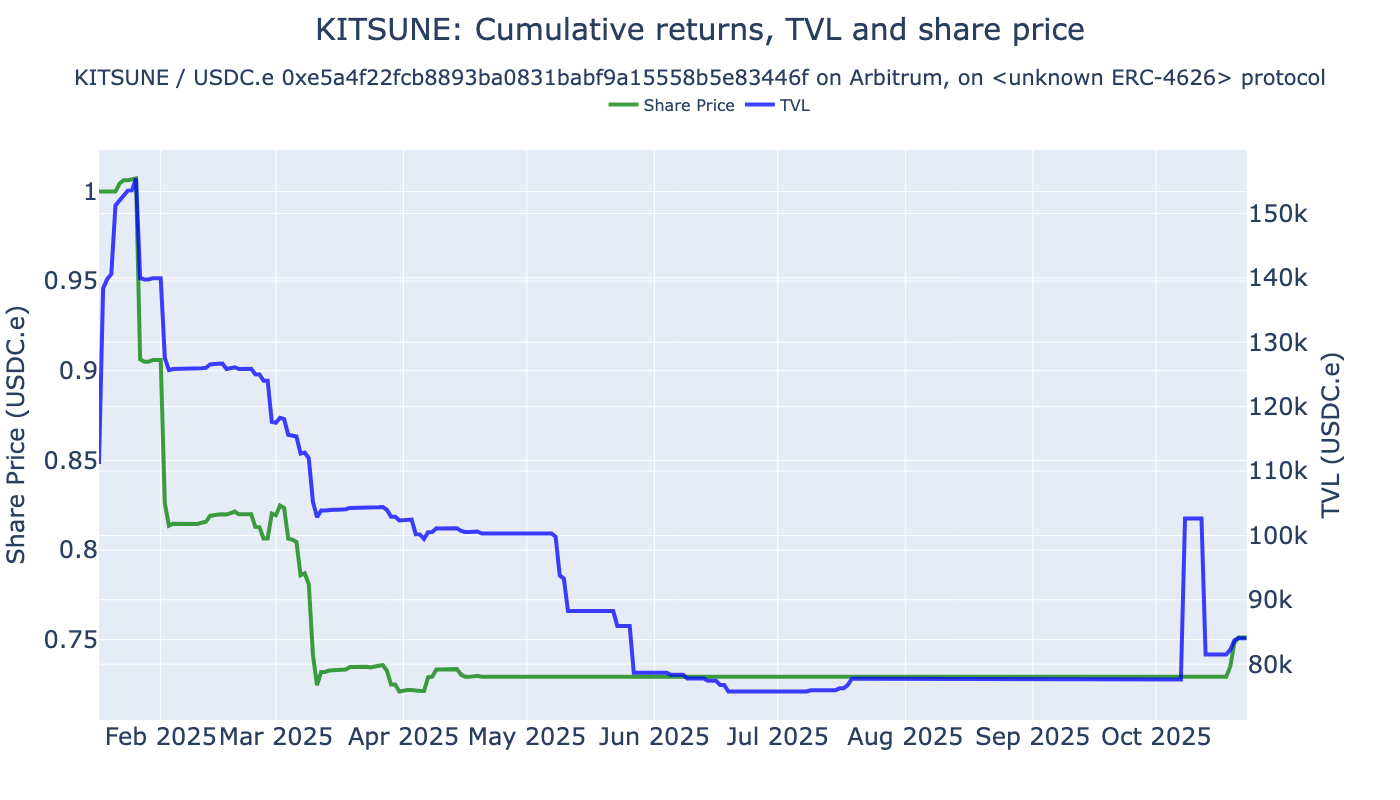

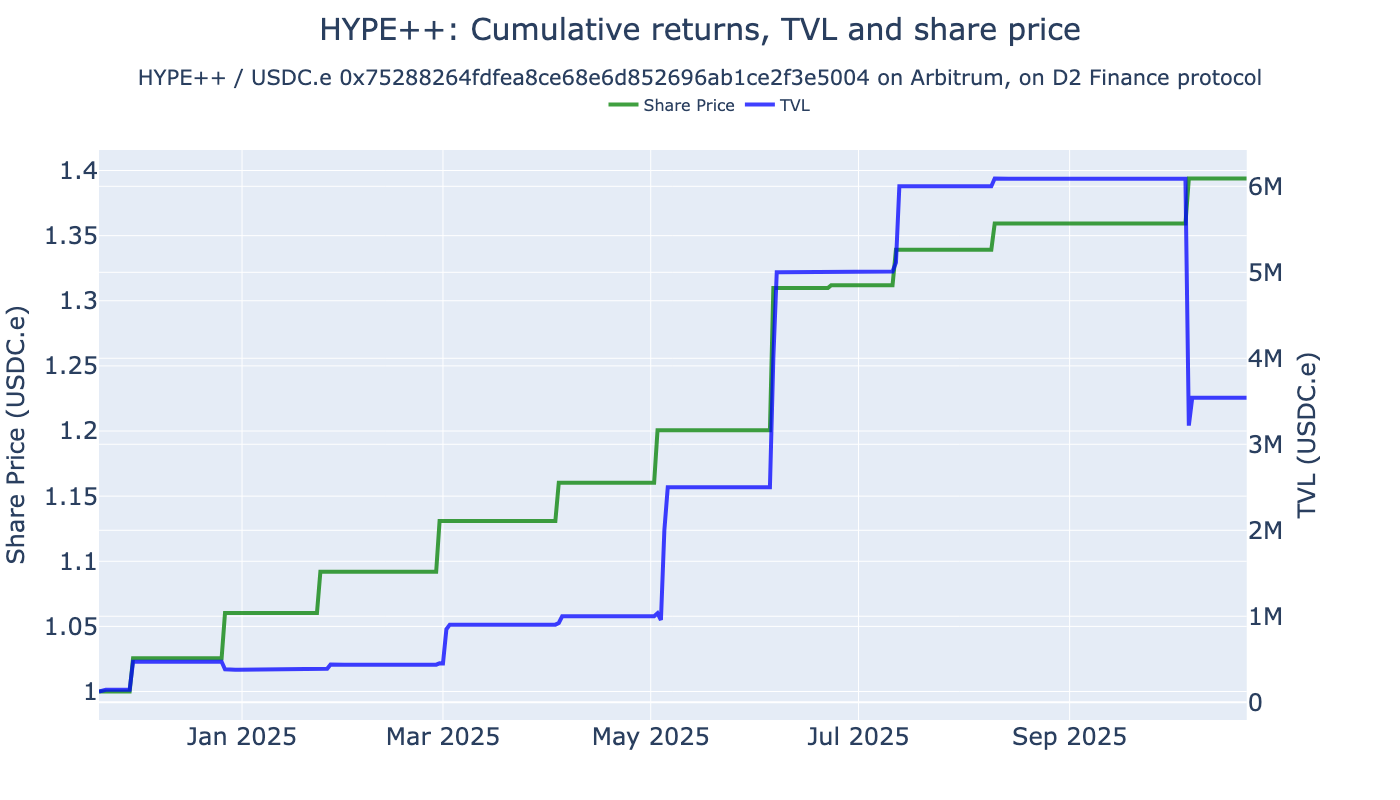

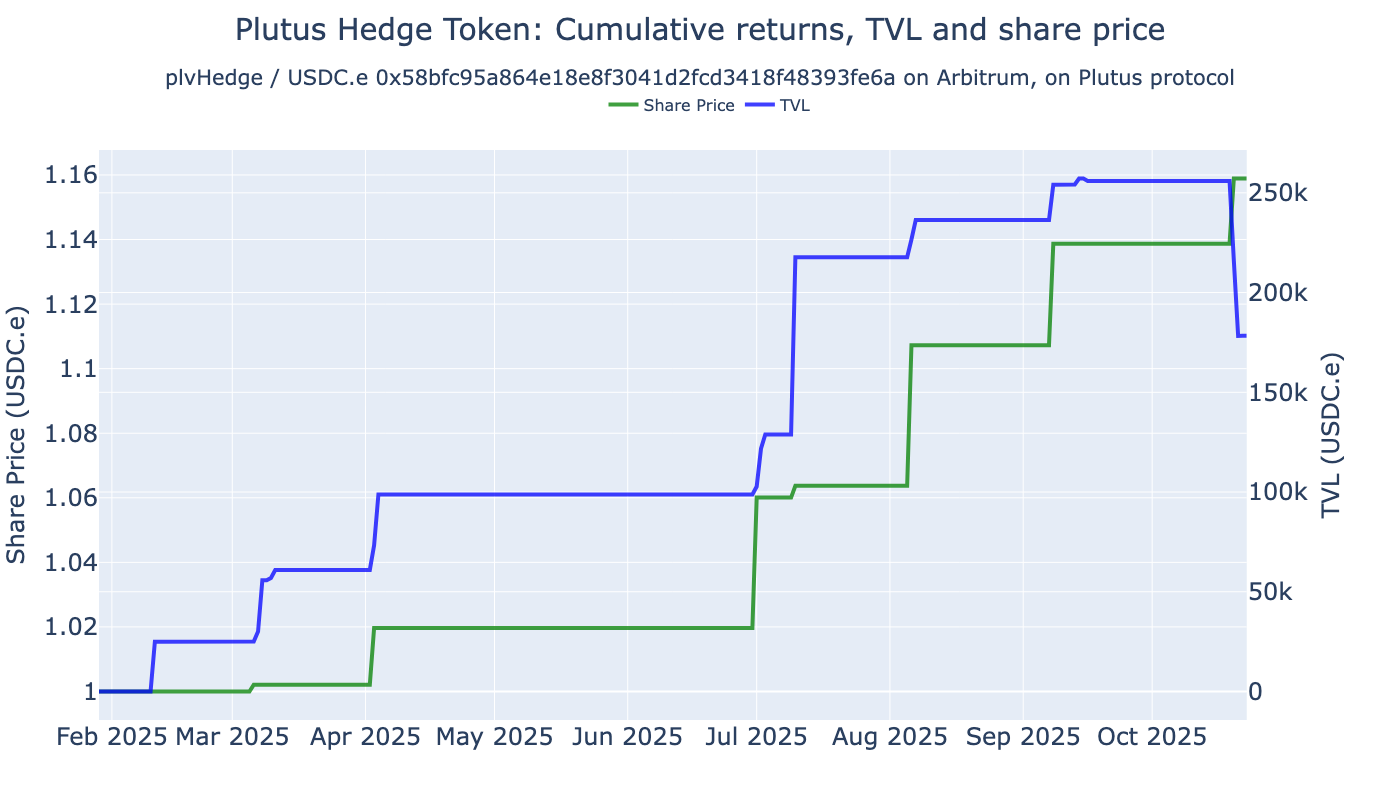

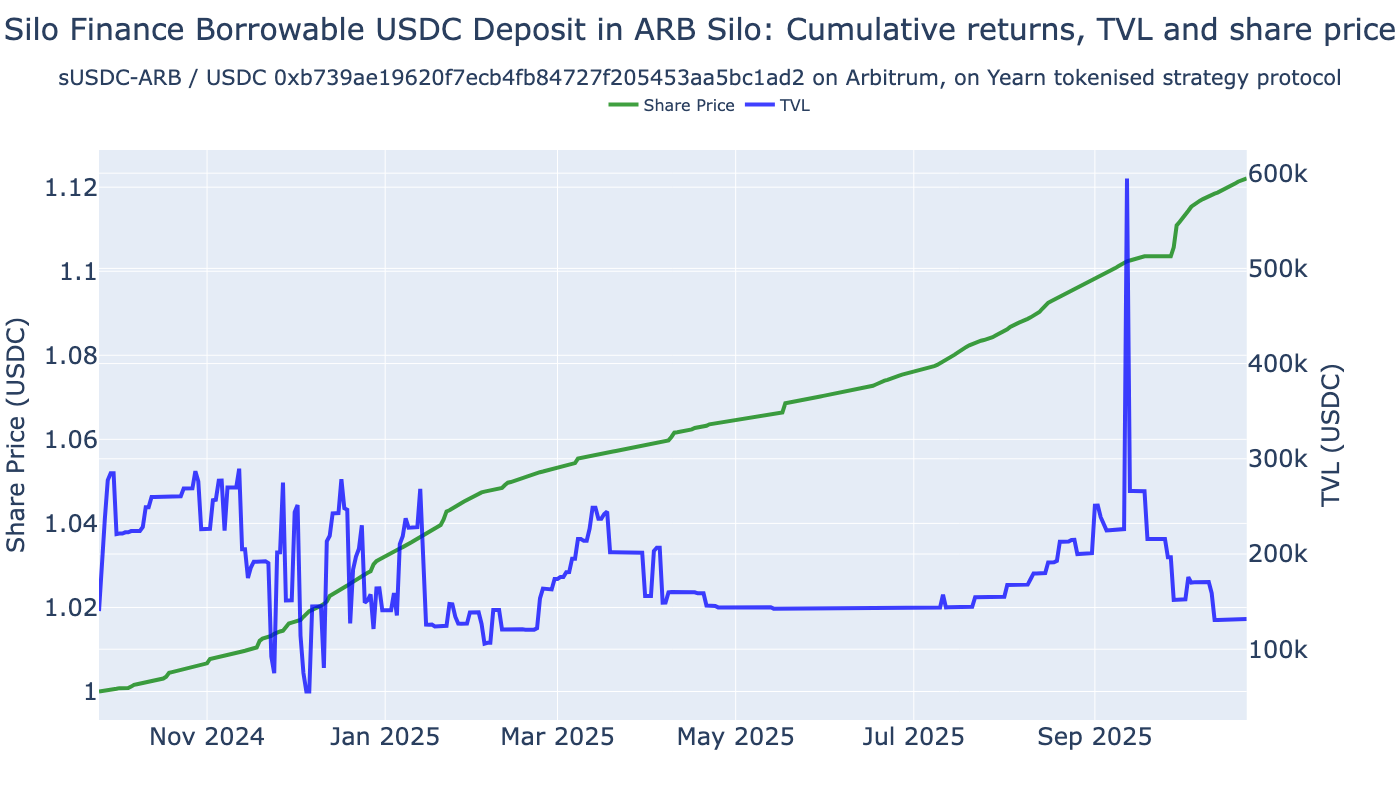

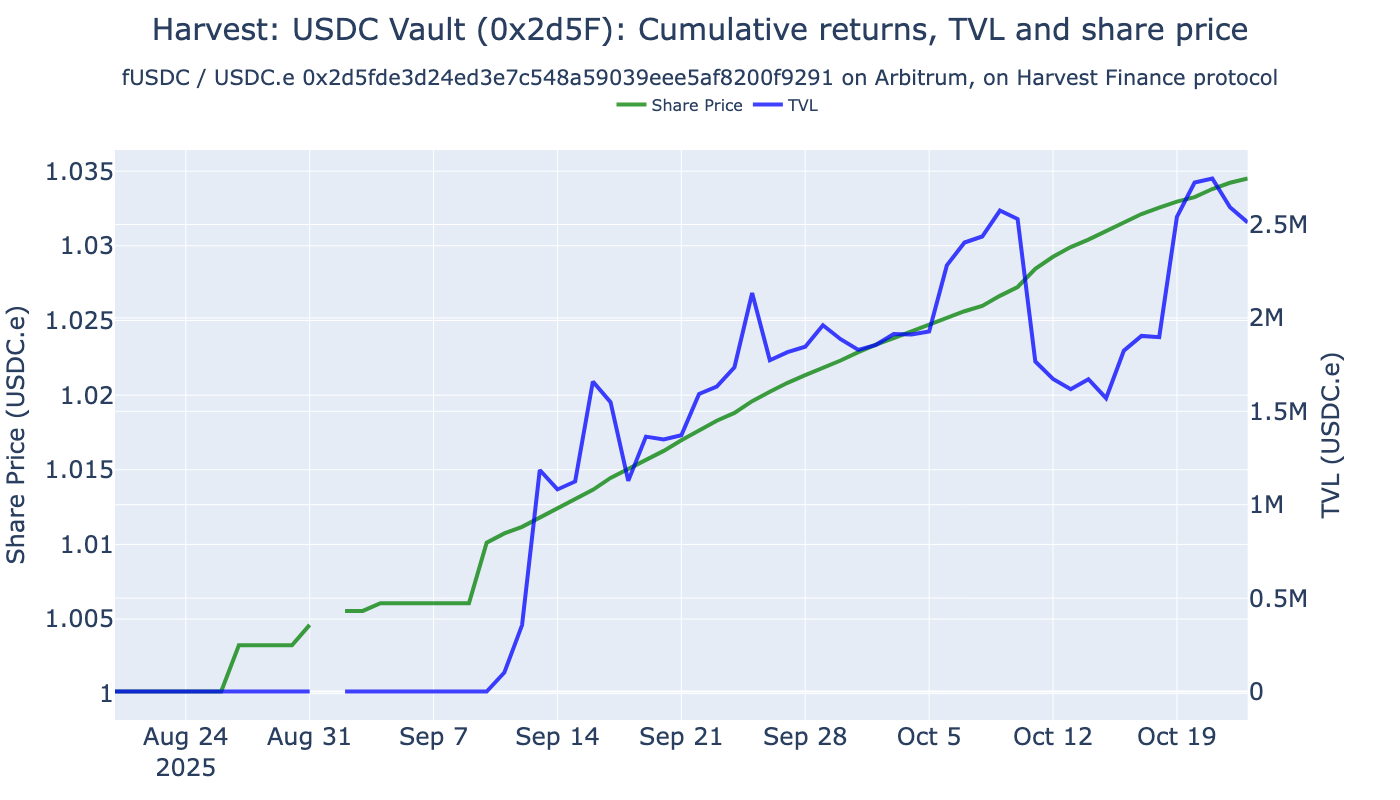

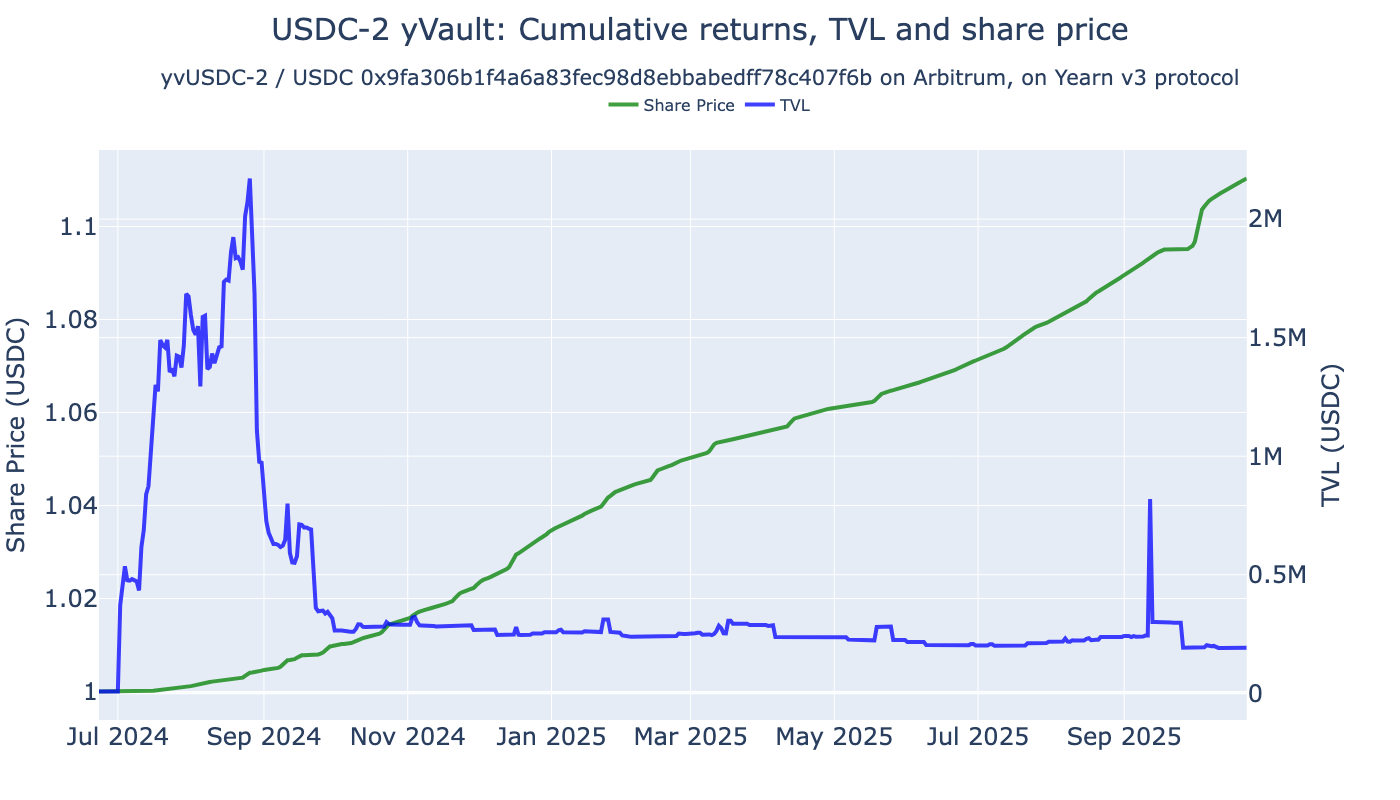

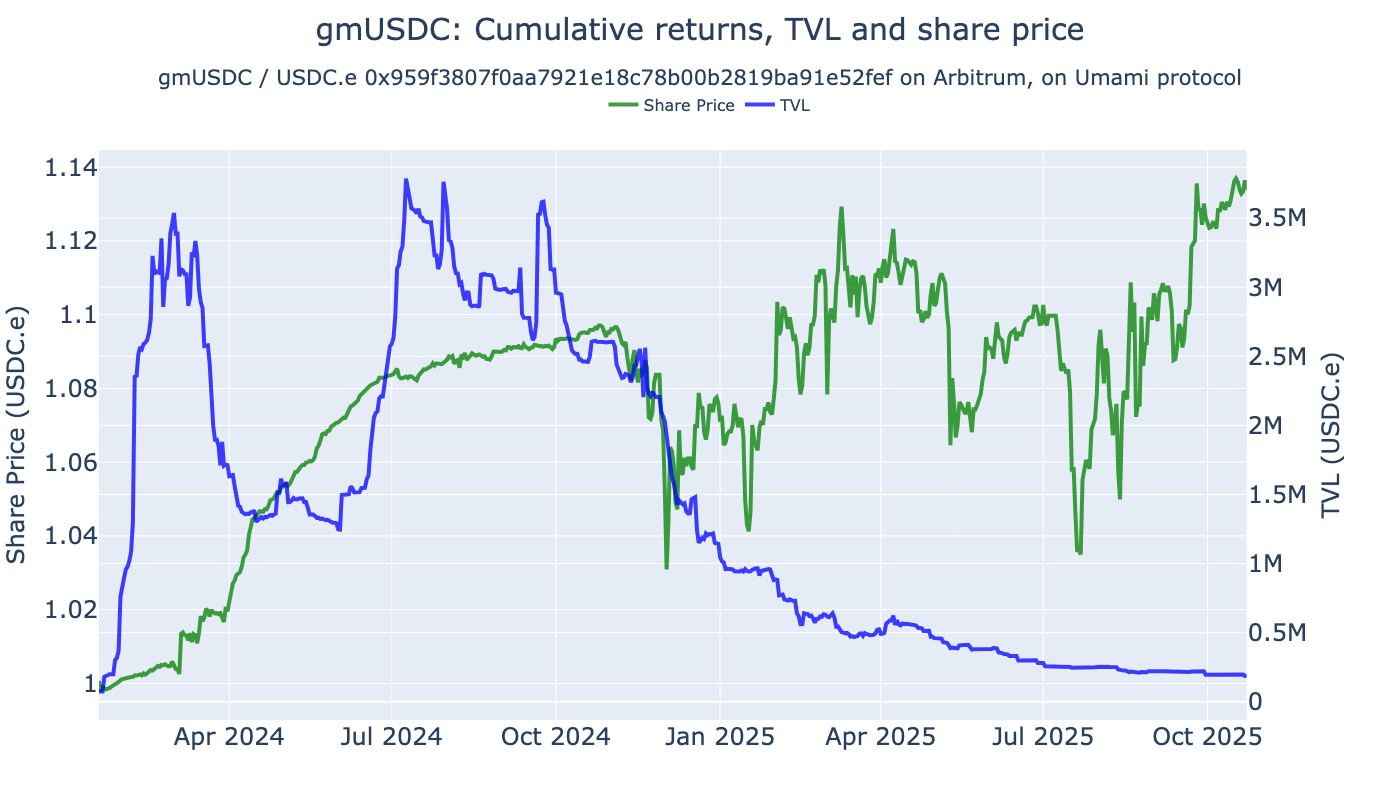

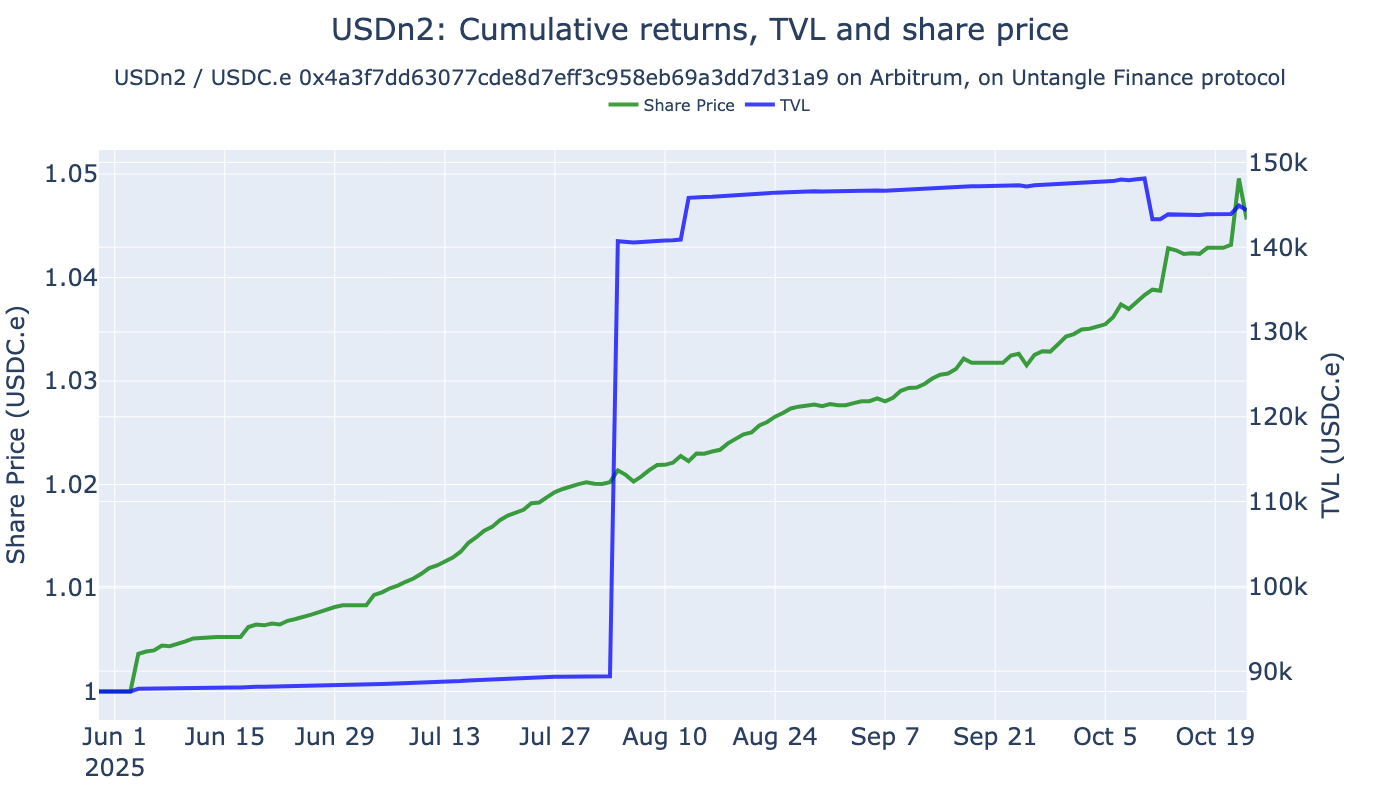

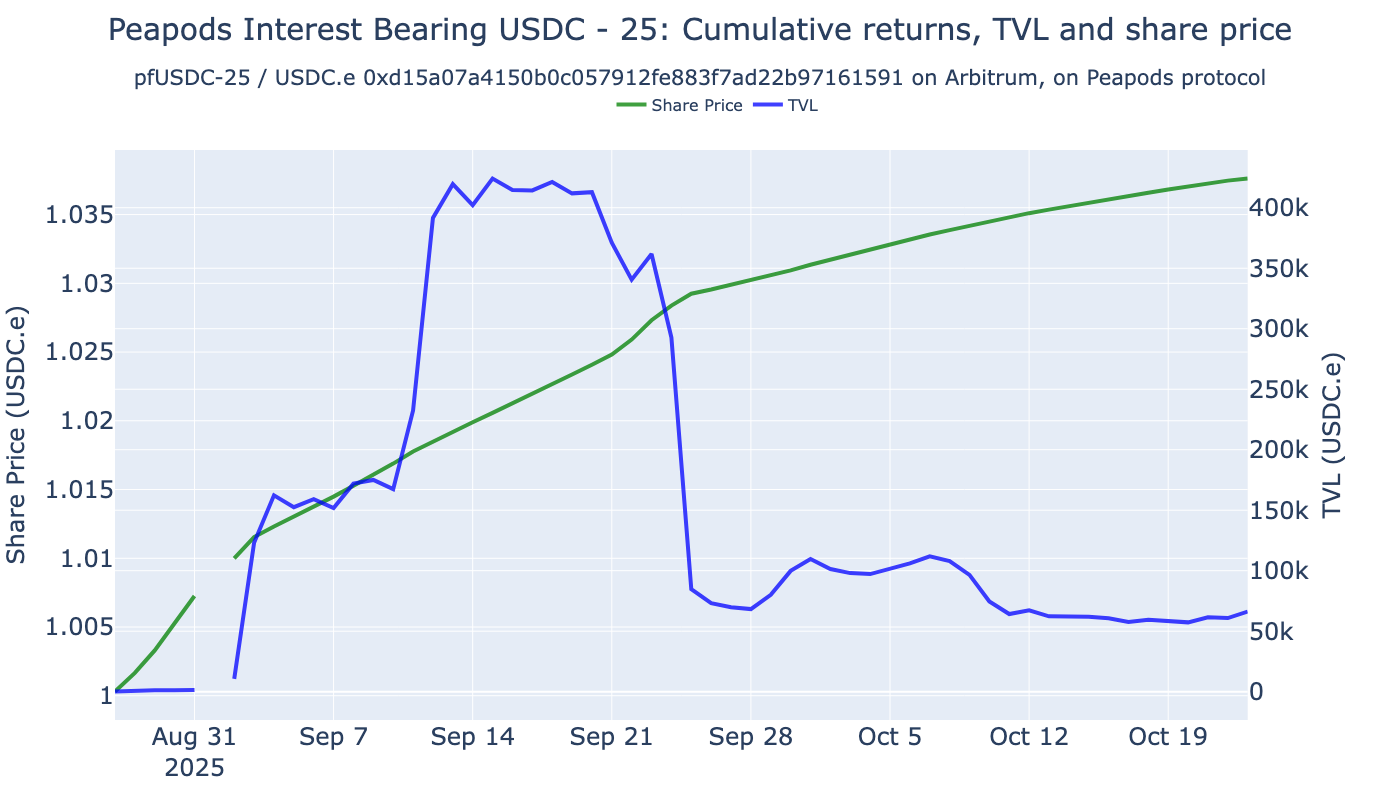

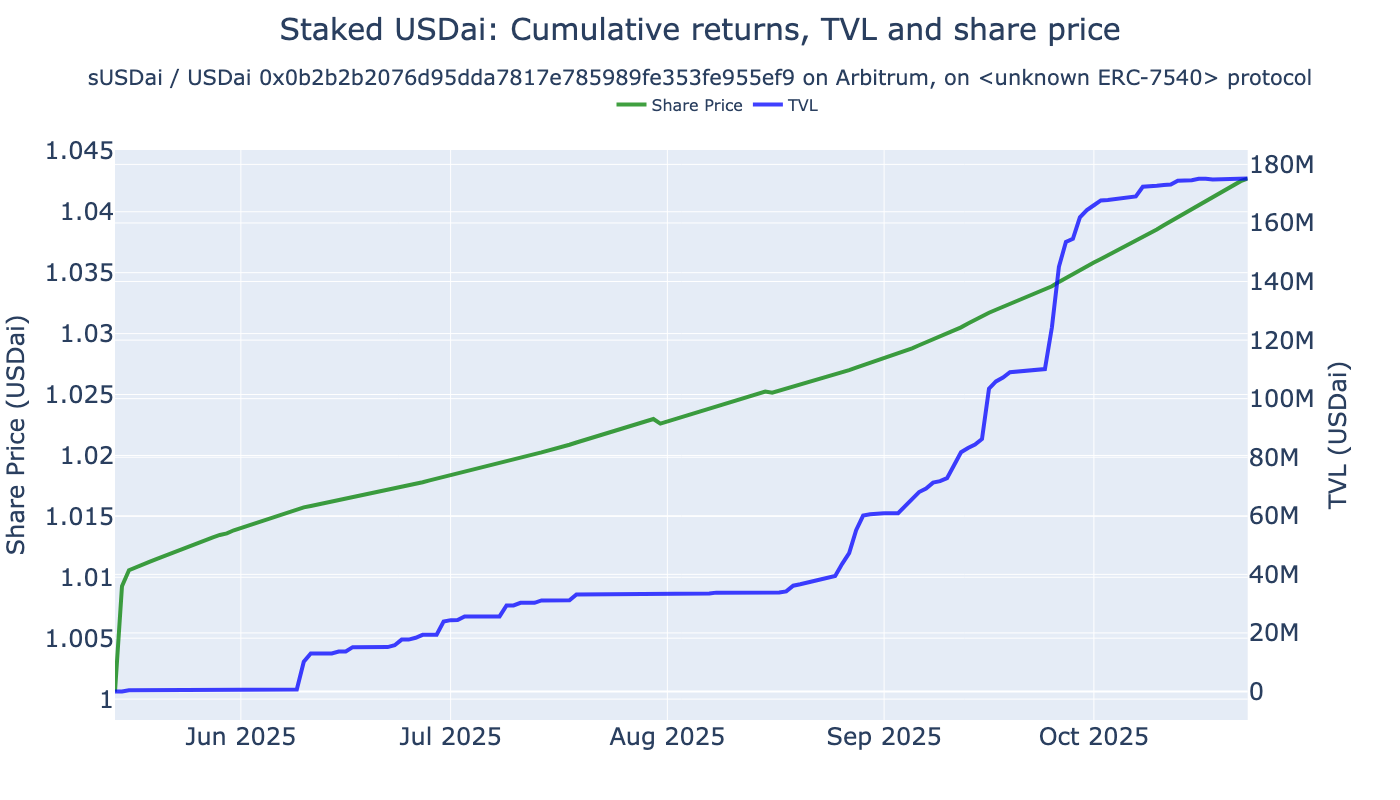

In [8]:
from eth_defi.research.vault_metrics import analyse_vault, format_ffn_performance_stats
from eth_defi.chain import get_chain_name
from eth_defi.research.value_table import format_series_as_multi_column_grid

from tabulate import tabulate
from IPython.display import display, HTML

interest_vault_specs = []

for idx, row in lifetime_data_filtered_df.head(10).iterrows():

    chain_id = row["id"].split("-")[0]
    address = row["id"].split("-")[1]
    vault_spec = VaultSpec(chain_id=int(chain_id), vault_address=address)

    # Used later
    interest_vault_specs.append(vault_spec)

    vault_report = analyse_vault(
        vault_db=vault_db,
        prices_df=prices_df,
        spec=vault_spec,
        chart_frequency="daily",
        logger=lambda x: None,
    )

    chain_name = get_chain_name(vault_spec.chain_id)
    vault_name = vault_report.vault_metadata["Name"]
    display(HTML(f"<h2>Vault {vault_name} ({chain_name}): {vault_spec.vault_address})</h2><br>"))

    # Display returns figur
    returns_chart_fig = vault_report.rolling_returns_chart
    returns_chart_fig.show()

    # Check raw montly share price numbers for each vault
    hourly_price_df = vault_report.hourly_df
    last_price_at = hourly_price_df.index[-1]
    last_price = hourly_price_df["share_price"].asof(last_price_at)
    last_block = hourly_price_df["block_number"].asof(last_price_at)
    month_ago = last_price_at - pd.DateOffset(months=1)
    month_ago_price = hourly_price_df["share_price"].asof(month_ago)
    month_ago_block = hourly_price_df["block_number"].asof(month_ago)

    # Price may be NA if vault is less than month old
    # assert not pd.isna(month_ago_price), f"Vault {vault_spec.chain_id}-{vault_spec.vault_address}: no price data for month ago {month_ago} found, last price at {last_price_at} is {last_price}"

    data = {
        "Vault": f"{vault_name} ({chain_name})",
        "Last price at": last_price_at,
        "Last price": last_price,
        "Block last price": f"{month_ago_block:,}",
        "Month ago": month_ago,
        "Block month ago": f"{month_ago_block:,}",
        "Month ago price": month_ago_price,
        "Monthly change %": (last_price - month_ago_price) / month_ago_price * 100,
    }

    df = pd.Series(data)
    # display(df)

    # Display FFN stats
    performance_stats = vault_report.performance_stats
    if performance_stats is not None:
        stats_df = format_ffn_performance_stats(performance_stats)

        multi_column_df = format_series_as_multi_column_grid(stats_df)

        # display(stats_df)
        display(HTML(multi_column_df.to_html(float_format='{:,.2f}'.format, index=True)))
    else:
        print(f"Vault {vault_spec.chain_id}-{vault_spec.vault_address}: performance metrics not available, is quantstats library installed?")

## Rolling returns comparison

- Show rolling returns of all picked vaults

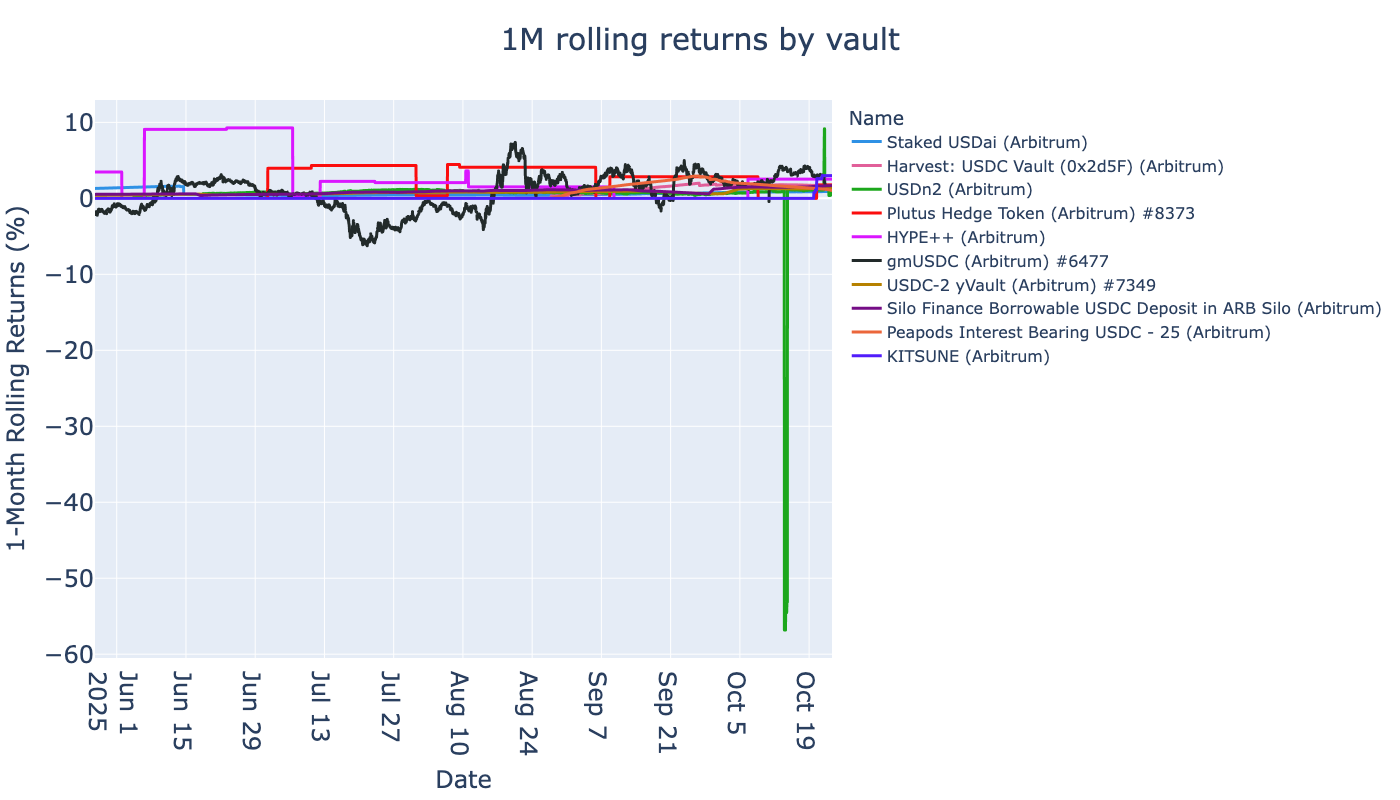

In [9]:
from eth_defi.research.rolling_returns import calculate_rolling_returns, visualise_rolling_returns

rolling_returns_df = calculate_rolling_returns(
    prices_df,
    interesting_vaults=[spec.as_string_id() for spec in interest_vault_specs],
    clip_up=100,
)

# display(rolling_returns_df.head(3))

assert len(rolling_returns_df) > 0, "No rolling returns calculated"

fig = visualise_rolling_returns(rolling_returns_df)

fig.show()

## All vaults

- List all vaults found on this chain



In [10]:
min_tvl = 1_000

lifetime_data_filtered_df = lifetime_data_df[lifetime_data_df["current_nav"] >= min_tvl]

formatted_df = format_lifetime_table(
    lifetime_data_filtered_df,
    add_index=True,
)

display(formatted_df)


Name Lifetime return  \
#                                                                       
1                                              HYPE++          39.39%   
2                                  Plutus Hedge Token          15.89%   
3    Silo Finance Borrowable USDC Deposit in ARB Silo          12.21%   
4                        Harvest: USDC Vault (0x2d5F)           3.45%   
5                                       USDC-2 yVault          11.03%   
6                                              gmUSDC          13.39%   
7                                               USDn2           4.56%   
8                  Peapods Interest Bearing USDC - 25           3.76%   
9                                        Staked USDai           4.27%   
10                       Harvest: USDC Vault (0x5E77)           0.28%   
11                          Clearstar High Yield USDC           0.15%   
12                          Nashpoint DeFi & RWA Fund           2.42%   
13                            Yield Chasing Silo USDC           9.39%   
14                            Autopilot USDC Arbitrum           1.30%   
15                           LazyVault_LowerRisk_USDC           3.84%   
16                               Yield Chasing crvUSD          11.46%   
17                                 Yield Chasing USDC           6.89%   
18                                 Gains Network USDC          24.07%   
19  Silo Finance Borrowable USDC Deposit, SiloId: 145           1.10%   
20  Silo Finance Borrowable USDC Deposit, SiloId: 146           1.30%   
21                             Clearstar USDC Reactor           1.07%   
22                                   MEV Capital USDC           1.57%   
23                       Harvest: USDC Vault (0x4A8e)           0.16%   
24                                     Hyperithm USDC           0.99%   
25                                     Dolomite: USDT           7.81%   
26                                   Yearn Degen USDC           0.85%   
27                                     Dolomite: USDC           7.83%   
28                                         Saving USX          11.66%   
29                                 Gauntlet USDC Core           0.98%   
30                                        Staked USDX          11.29%   
31                                   Prime Tether USD           8.61%   
32                          Euler Arbitrum Yield USDC           0.71%   
33                              Steakhouse Prime USDC           0.93%   
34                              K3 Capital USDai USDC           0.81%   
35                         Steakhouse High Yield USDC           0.83%   
36                                Euler Arbitrum USDC           1.50%   
37                                    Euler Earn USDC           0.65%   
38                      BasisOS USDC-LINK Hyperliquid           4.55%   
39                         Wrapped Aave Arbitrum USDT           2.76%   
40                          Static Aave Arbitrum USDT           9.94%   
41                                      Yearn OG USDC           0.99%   
42                                   Spark USDC Vault           2.99%   
43                          Wrapped Aave Arbitrum GHO           2.69%   
44                                 Frontier Theo USDC           0.49%   
45                           LazyVault_LowerRisk_USDT           3.19%   
46                             Curve Vault for crvUSD           8.77%   
47                                    Fluid Gho Token           0.84%   
48                                Gauntlet USDC Prime           0.74%   
49                        Wrapped Aave Arbitrum USDCn           2.82%   
50                         Static Aave Arbitrum USDCn           9.92%   
51                   Crypto.com Defi Wallet AAVE USDT           6.04%   
52                                   Fluid Tether USD           9.17%   
53                                        dForce USDC           0.55%   
54                                